In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [30]:
fashion_mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [32]:
train_images.shape

(60000, 28, 28)

In [34]:
train_images = train_images / 255.0

test_images = test_images / 255.0

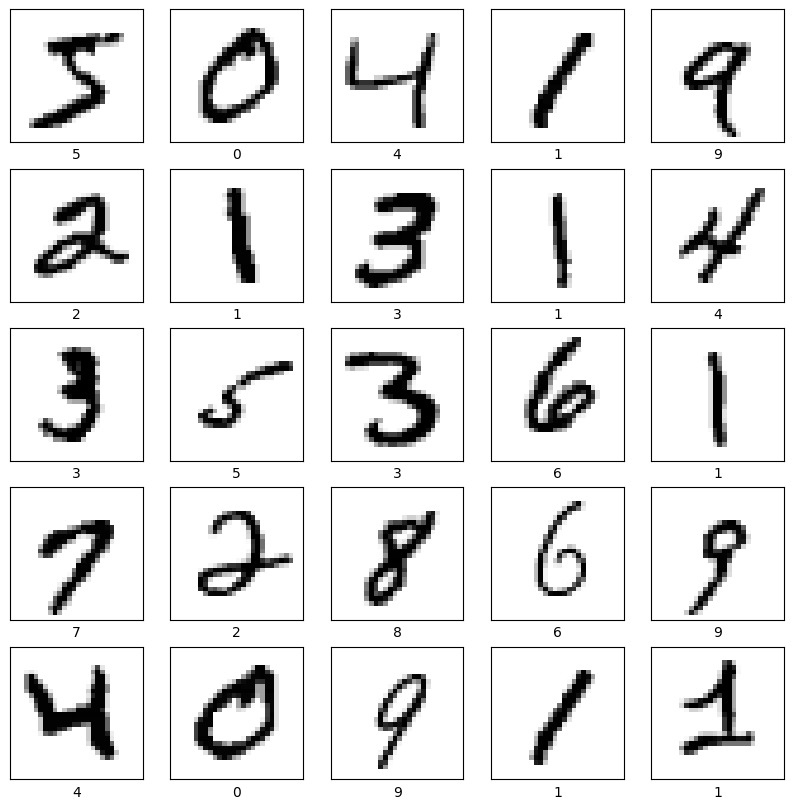

In [56]:
# Plotting Sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Building Model

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/home/bittu/Desktop/MachineLearning/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1722412705.612080    6202 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722412705.727880    6202 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722412705.728241    6202 cuda_executor.cc:1015] successful NUM

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20


2024-07-31 13:28:33.438528: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-07-31 13:28:33.631626: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
I0000 00:00:1722412714.129481    9680 service.cc:146] XLA service 0x7469e4007940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722412714.129519    9680 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-07-31 13:28:34.158576: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-31 13:28:34.247051: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


 251/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7405 - loss: 0.9523

I0000 00:00:1722412714.847329    9680 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 606us/step - accuracy: 0.8809 - loss: 0.4328
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.9652 - loss: 0.1221
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.9764 - loss: 0.0783
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.9818 - loss: 0.0589
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.9869 - loss: 0.0444
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.9898 - loss: 0.0326
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.9920 - loss: 0.0255
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.9941 - loss: 0.0200
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.9935 - loss: 0.0194
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.9958 - loss: 0.0141
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.9963 - loss: 0.0121
Epoch 12/20
1875/18

In [43]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 556us/step - accuracy: 0.9800 - loss: 0.0961

Test accuracy: 0.9800000190734863


In [44]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [45]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step


In [46]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

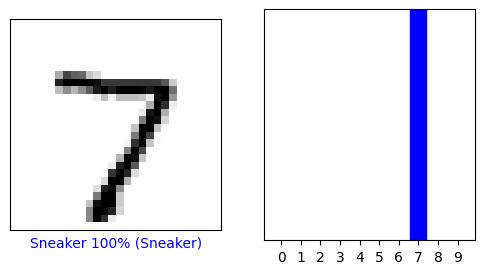

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

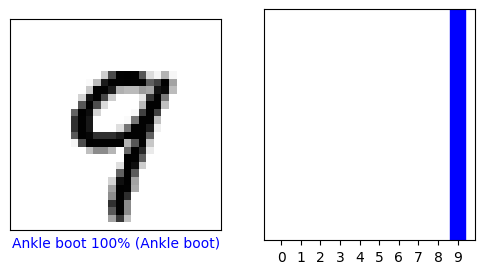

In [48]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [49]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [50]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [55]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[1.8965076e-16 1.4838318e-09 1.0000000e+00 1.0651124e-14 7.5034570e-26
  6.1467693e-13 1.1426782e-12 7.1683383e-21 1.7260259e-16 3.3995669e-30]]
